In [1]:
!pip install scikit-learn==1.1.3 -q

## Как не прогадать при покупке коров?
## Описание задачи

Требуется разработать модель машинного обучения, которая поможет фермеру принимать объективное решение о покупке новой коровы.   

Основные критерии для отбора коров, которые установил фермер:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

### Описание исходных данных

#### Данные о коровах фермера:		
        
- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

#### Данные о папах коров фермера:		

- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.

#### Данные о коровах "ЭкоФермы", у которой фермер собирается покупать коров:		

- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

## Загрузка данных

In [151]:
import pandas as pd
import seaborn as sb
import numpy  as np

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix
)

In [152]:
# считываем датасет с данными о коровах фермера
try:
    df_cow = pd.read_csv('c:/users/datasets/ferma_main.csv', decimal=",", sep=';')
except:
    df_cow = pd.read_csv('/datasets/ferma_main.csv',  decimal=",", sep=';')
# считываем датасет с данными о папах коров фермера
try:
    df_dad = pd.read_csv('c:/users/datasets/ferma_dad.csv', decimal=",", sep=';')
except:
    df_dad = pd.read_csv('/datasets/ferma_dad.csv', decimal=",", sep=';')  
# считываем датасет с данными о коровах ЭкоФермы
try:
    df_eco = pd.read_csv('c:/users/datasets/cow_buy.csv', decimal=",", sep=';')
except:
    df_eco = pd.read_csv('/datasets/cow_buy.csv', decimal=",", sep=';') 
#выводим данные на экран для проверки
display(df_cow.head())
display(df_dad.head())
display(df_eco.head())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


**Вывод:** данные загружены и визулизированы, можно переходить к этапу их предобработки

##  Предобработка данных

Проверяем соответствие типов данных, наличие пропусков и дубликатов в датасете **df_cow**

In [153]:
display(df_cow.info())
print('-----------------------')
display(df_cow.duplicated().sum())
print('-----------------------')
display(df_cow.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

None

-----------------------


5

-----------------------


id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

Типы данных в датасете df_cow соответствуют, пропуски отсутствуют и имеется 5 дубликатов. Удалим дубликаты.

In [154]:
df_cow = df_cow.drop_duplicates()
df_cow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   Удой, кг                               629 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  629 non-null    float64
 3   Сырой протеин, г                       629 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   629 non-null    float64
 5   Порода                                 629 non-null    object 
 6   Тип пастбища                           629 non-null    object 
 7   порода папы_быка                       629 non-null    object 
 8   Жирность,%                             629 non-null    float64
 9   Белок,%                                629 non-null    float64
 10  Вкус молока                            629 non-null    object 
 11  Возрас

Проверим категориальные данные

In [155]:
display(df_cow['Порода'].value_counts())
print('----------------')
display(df_cow['Тип пастбища'].value_counts())
print('----------------')
display(df_cow['порода папы_быка'].value_counts())
print('----------------')
display(df_cow['Вкус молока'].value_counts())
print('----------------')
display(df_cow['Возраст'].value_counts())

Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: Порода, dtype: int64

----------------


Холмистое    351
Равнинное    253
Равнинные     25
Name: Тип пастбища, dtype: int64

----------------


Соверин    311
Айдиал     240
Айдиалл     78
Name: порода папы_быка, dtype: int64

----------------


вкусно       371
не вкусно    258
Name: Вкус молока, dtype: int64

----------------


более_2_лет    519
менее_2_лет    110
Name: Возраст, dtype: int64

Видим, что одинаковые значения в полях Тип пастбища и Породы папы_быка записаны по-разному, поэтому произведем замену этих значений и выведем на экран новую статистику в измененнных столбцах

In [156]:
df_cow = df_cow.replace({'Равнинные': 'Равнинное','Айдиалл': 'Айдиал'})
display(df_cow['Тип пастбища'].value_counts())
print('----------------')
display(df_cow['порода папы_быка'].value_counts())

Холмистое    351
Равнинное    278
Name: Тип пастбища, dtype: int64

----------------


Айдиал     318
Соверин    311
Name: порода папы_быка, dtype: int64

Проверяем соответствие типов данных, наличие пропусков и дубликатов, различные наименования в категориальных данных в датасете **df_dad**

In [157]:
df_dad.info()
df_dad.duplicated().sum()
df_dad['Имя Папы'].value_counts()
print('----------------')
df_dad.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
----------------


id          0
Имя Папы    0
dtype: int64

Типы данных в датасете df_dad соответствуют, пропуски и дубликаты отсутствуют, в именах ошибок нет.     
Проверяем соответствие типов данных, наличие пропусков и дубликатов, а также различия в наименованиях категориальных данных в датасете **df_eco**

In [158]:
display(df_eco.info())
print('----------------')
display(df_eco.duplicated().sum())
print('----------------')
display(df_eco.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

----------------


4

----------------


Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64

Типы данных в датасете df_eco соответствуют, пропуски отсутствуют и имеется 4 дубликата.    
Поскольку по условию задачи для этой таблицы мы будем строить прогноз, то оставим дубли, полагая, что ЭкоФерма имела в виду разных коров.

In [159]:
#df_eco = df_eco.drop_duplicates()
#df_eco.info()
print('----------------')
display(df_eco['Порода'].value_counts())
print('----------------')
display(df_eco['Тип пастбища'].value_counts())
print('----------------')
display(df_eco['порода папы_быка'].value_counts())
print('----------------')
display(df_eco['Имя_папы'].value_counts())
print('----------------')
display(df_eco['Возраст'].value_counts())
print('----------------')
# изменим названия полей (как в основном датасете)
df_eco.rename(columns= {'Текущая_жирность,%':'Жирность,%', 'Имя_папы':'Имя Папы'}, inplace = True)
# изменим значения поля Тип пастбища (как в основном датасете)
df_eco['Тип пастбища'] = df_eco['Тип пастбища'].str.replace('холмистое','Холмистое')
df_eco['Тип пастбища'] = df_eco['Тип пастбища'].str.replace('равнинное','Равнинное')

----------------


РефлешнСоверинг    11
Вис Бик Айдиал      9
Name: Порода, dtype: int64

----------------


равнинное    11
холмистое     9
Name: Тип пастбища, dtype: int64

----------------


Соверин    12
Айдиал      8
Name: порода папы_быка, dtype: int64

----------------


Буйный      8
Геркулес    6
Барин       4
Соловчик    2
Name: Имя_папы, dtype: int64

----------------


более_2_лет    15
менее_2_лет     5
Name: Возраст, dtype: int64

----------------


**Вывод:** типы данных в исходных датасетах соответствуют содержимому, пропуски отсутствовали, дубликаты признали не дубликатами и не стали их удалять, в категориальных данных исправлены ошибки в названиях категорий.     
Можно переходить к исследованию данных.

## Исследовательский анализ данных

Исследуем датасет df_cow

In [160]:
display(df_cow.describe())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%"
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Видим, что в столбце 'Удой' присутствует выброс - значение 45616. Остальные показатели в числовых столбцах выглядят естественно, без выбросов.    
Удалим строку с аномальным значением и перейдем к построению графиков.

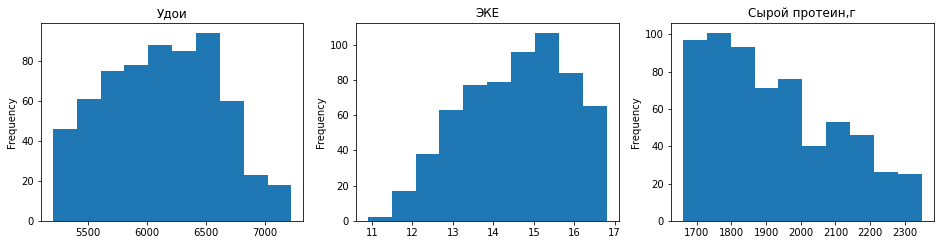

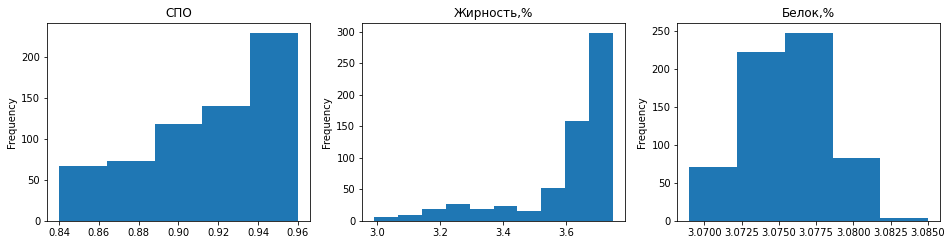

In [161]:
df_cow = df_cow.drop(df_cow[df_cow['Удой, кг']==df_cow['Удой, кг'].max()].index)
df_cow.describe()
# строим гистограммы по каждому столбцу с числовыми показателями
plt.figure(figsize=(16, 8))
plt.subplot(2,3,1)
df_cow['Удой, кг'].plot(kind='hist', bins=10, title='Удои', xlabel='Удои,кг')
plt.subplot(2,3,2)
df_cow['ЭКЕ (Энергетическая кормовая единица)'].plot(kind='hist', bins=10, title='ЭКЕ', xlabel='ЭКЕ')
plt.subplot(2,3,3)
df_cow['Сырой протеин, г'].plot(kind='hist', bins=10, title='Сырой протеин,г', xlabel='Протеин')
plt.figure(figsize=(16, 8))
plt.subplot(2,3,1)
df_cow['СПО (Сахаро-протеиновое соотношение)'].plot(kind='hist', bins=5, title='СПО', xlabel='СПО')
plt.subplot(2,3,2)
df_cow['Жирность,%'].plot(kind='hist', bins=10, title='Жирность,%', xlabel='Жирность')
plt.subplot(2,3,3)
df_cow['Белок,%'].plot(kind='hist', bins=5, title='Белок,%', xlabel='Белок')
plt.show()

Из представленных гистограмм видно, что:
- Удои, ЭКЕ и Белок имеют похожее на нормальное распределения,
- показатель Сырого протеина имеет ярко выраженное смещение влево,
- показатели Жирности и СПО имеют смещение вправо.

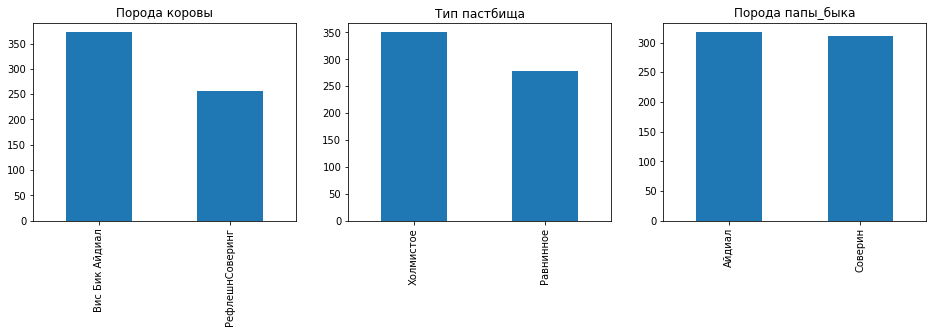

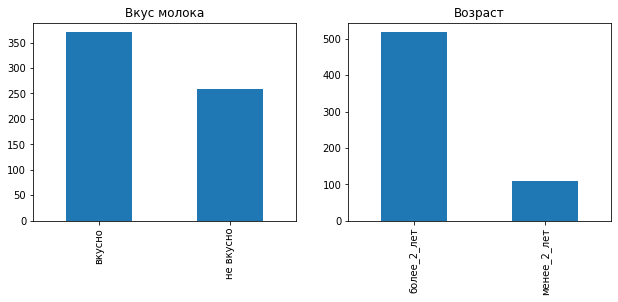

In [162]:
# строим столбчатую диаграмму по каждому столбцу с категориальными значениями
plt.figure(figsize=(16, 8))
plt.subplot(2,3,1)
df_cow['Порода'].value_counts().plot(kind='bar', title='Порода коровы')
plt.subplot(2,3,2)
df_cow['Тип пастбища'].value_counts().plot(kind='bar', title='Тип пастбища')
plt.subplot(2,3,3)
df_cow['порода папы_быка'].value_counts().plot(kind='bar', title='Порода папы_быка')
plt.figure(figsize=(16, 8))
plt.subplot(2,3,1)
df_cow['Вкус молока'].value_counts().plot(kind='bar', title='Вкус молока')
plt.subplot(2,3,2)
df_cow['Возраст'].value_counts().plot(kind='bar', title='Возраст')
plt.show()

Из построенных диаграмм видим, что:     
- преимущественная порода имеющихся у фермера коров - Вис Бик Айдиал,
- пасутся коровы преимущественно на холмистой местности,
- среди пап-быков преобладают Соверины,
- большую часть молока фермер оценивает как вкусное,
- коров старше 2-х лет больше, чем коров до 2-х лет.

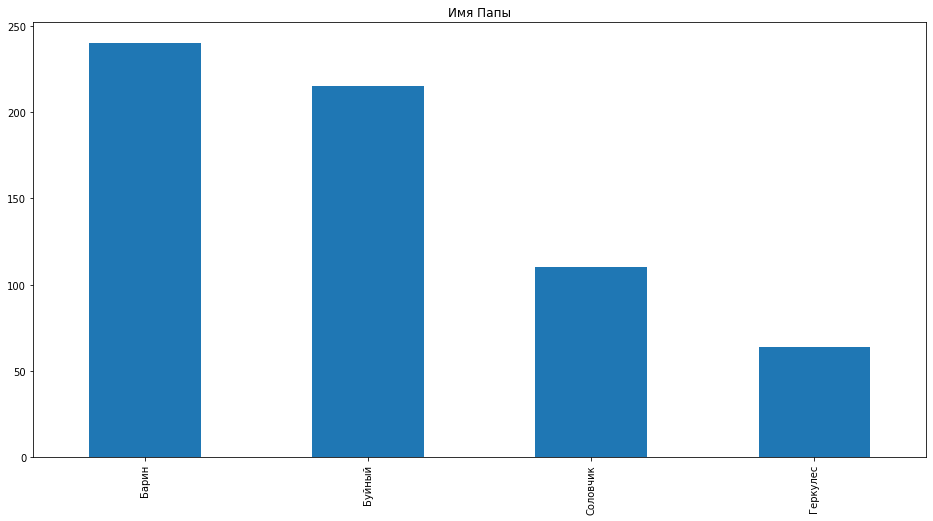

In [163]:
# строим столбчатую диаграмму для датасета пап-быков df_dad
plt.figure(figsize=(16, 8))
df_dad['Имя Папы'].value_counts().plot(kind='bar', title='Имя Папы')
plt.show()

Быки *Барин* и *Буйный* чаще других становятся отцами для потомства.    
Исследуем данные коров с ЭкоФермы.

,"Жирность,%","Текущий_уровень_белок,%"
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


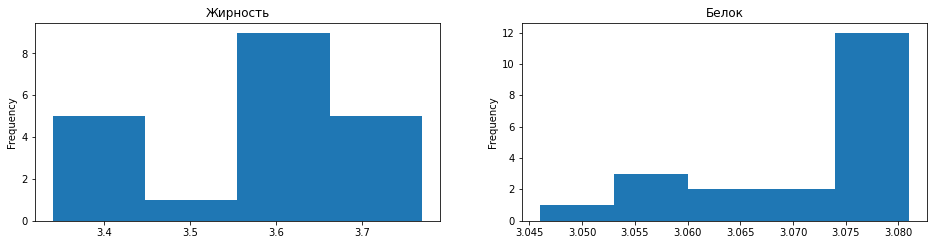

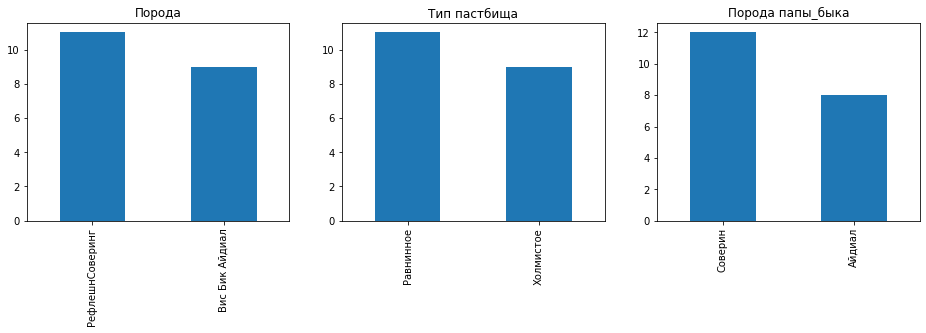

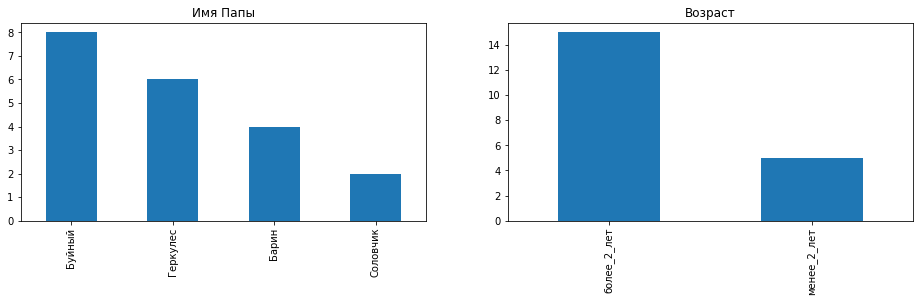

In [164]:
display(df_eco.describe())
# строим гистограммы для количественных характеристик датасета ЭкоФермы df_eco
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
df_eco['Жирность,%'].plot(kind='hist', bins=4, title='Жирность', xlabel='Жирность,%')
plt.subplot(2,2,2)
df_eco['Текущий_уровень_белок,%'].plot(kind='hist', bins=5, title='Белок', xlabel='Текущий_уровень_белок,%')
plt.figure(figsize=(16, 8))
plt.subplot(2,3,1)
df_eco['Порода'].value_counts().plot(kind='bar', title='Порода')
plt.subplot(2,3,2)
df_eco['Тип пастбища'].value_counts().plot(kind='bar', title='Тип пастбища')
plt.subplot(2,3,3)
df_eco['порода папы_быка'].value_counts().plot(kind='bar', title='Порода папы_быка')
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
df_eco['Имя Папы'].value_counts().plot(kind='bar', title='Имя Папы')
plt.subplot(2,2,2)
df_eco['Возраст'].value_counts().plot(kind='bar', title='Возраст')
plt.show()

У большинства коров с ЭкоФермы хорошие показатели Жирности и Белка в молоке.     

ЭкоФерма содержит одинаковое количество коров по породам, не отдает предпочтение какому-либо определенному пастбищу.     
Среди быков-отцов преобладают Северины. Лидирующие позиции среди отцов занимают Буйный и Геркулес.     
Коровы также преимущественно старше 2-х лет.

**Вывод:**     
Для коров фермера показатели Удои, ЭКЕ и Белок имеют похожее на нормальное распределения, показатель Сырого протеина имеет ярко выраженное смещение влево, а показатели Жирности и СПО - вправо.  

- преимущественная порода имеющихся у фермера коров - Вис Бик Айдиал,
- пасутся коровы преимущественно на холмистой местности,
- среди быков-отцов преобладают Соверины,
- большую часть молока фермер оценивает как вкусное,
- коров старше 2-х лет больше, чем коров до 2-х лет.

Большинство коров ЭкоФермы имеют высокие показатели Жирности и Белка в молоке.

- ЭкоФерма содержит одинаковое количество коров по породам,
- на разных пастбищах коровы пасутся в одинаковой пропорции,
- среди быков-отцов преобладают Северины,
- коров старше 2-х лет больше, чем коров до 2-х лет.

## Корреляционный анализ

Построим тепловую карту для матрицы корреляции датасета **df_cow**, чтобы определить связи характеристик.    
Поскольку мы определили, что в исходных данных не все признаки имеют нормальное распределение, то для определения корреляции показателей вместо *Корреляции Пирсона* мы используем *Корелляцию Спирмана*.

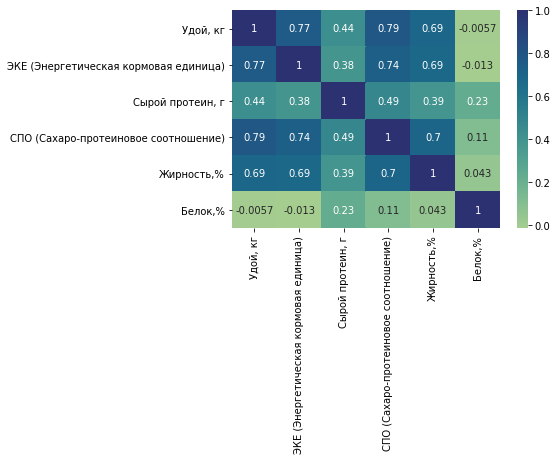

In [165]:
sb.heatmap(df_cow.drop('id', axis=1).corr(method='spearman'), annot=True, cmap='crest') 
plt.show()

Матрица корреляции показывает, что:
- Удой
 - имеет сильную положительную связь с показателями ЭКЕ и СПО и чуть слабее с показателями Жирность и Сырой протеин;
 - почти не зависит от характеристики Белок;
- ЭКЕ
 - имеет сильную положительную связь с характеристикой Удой и СПО, чуть слабее с показателем Жирность и среднюю положительную связь с показателем Сырой протеин;
- Сырой протеин
 - имеет средние положительные связи с СПО, Удой, Жирностью и ЭКЕ;
 - слабая связь с характеристикой Белок;
- СПО
 - имеет сильную положительную связь с Удой, ЭКЕ и Жирность, среднюю положительную - с Сырым протеином;
 - слабая связь с характеристикой Белок;
- Жирность
 - имеет сильную положительную связь с СПО, Удой, ЭКЕ;
 - среднюю положительную связь с Сырым протеином;
 - почти не зависит от характеристики Белок;
- Белок
 - практически не связан ни с одним из показателей, кроме слабой положительной связи с Сырым протеином.    
 
Построим диаграммы рассеяния для признака Удой, чтобы увидеть его взаимосвязи с остальными характеристиками

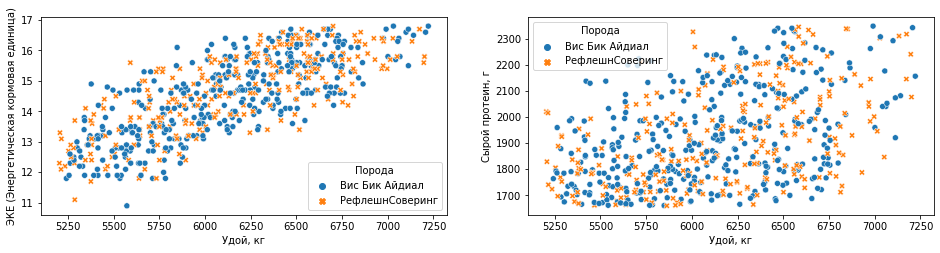

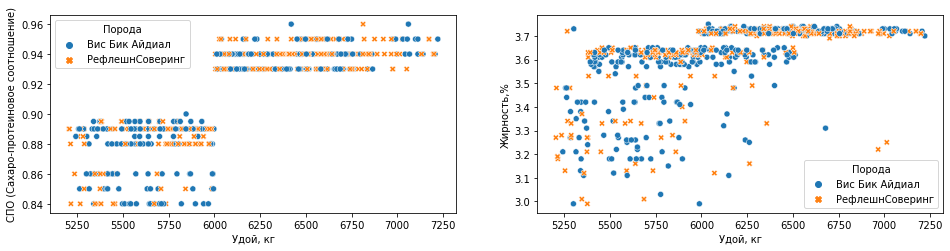

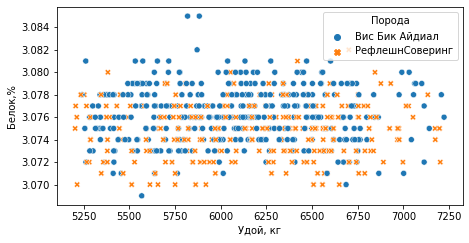

In [166]:
# ЭКЕ
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.scatterplot(data = df_cow, x="Удой, кг", y="ЭКЕ (Энергетическая кормовая единица)", hue = "Порода", style="Порода")
# Сырой протеин
plt.subplot(2,2,2)
sb.scatterplot(data = df_cow, x="Удой, кг", y="Сырой протеин, г", hue = "Порода", style="Порода")
# СПО
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.scatterplot(data = df_cow, x="Удой, кг", y="СПО (Сахаро-протеиновое соотношение)", hue = "Порода", style="Порода")
# Жирность
plt.subplot(2,2,2)
sb.scatterplot(data = df_cow, x="Удой, кг", y="Жирность,%", hue = "Порода", style="Порода")
# Белок
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.scatterplot(data = df_cow, x="Удой, кг", y="Белок,%", hue = "Порода", style="Порода")
plt.show()

Из построенных диаграмм видно, что:
- для показателей **Удоя** и **ЭКЕ** фигура на графике напоминает дугу (ветвь параболы), что говорит о том, что зависимость между этими показателями выражается квадратичной функцией. Удой одинаково рассеян для разных пород коров;
- для показателей **Удоя** и **Сырого протеина** зависимость больше похожа на линейную с очень большими отклонениями от центральной линии;
- для показателей **СПО и Жирность** характерна задача классификации относительно массы Удоя (больше 6000 и меньше 6000);
- показатель Белок не имеет линейной зависимости от Удоев.     

Посмотрим на зависимость в разрезе **Возраста коров**.

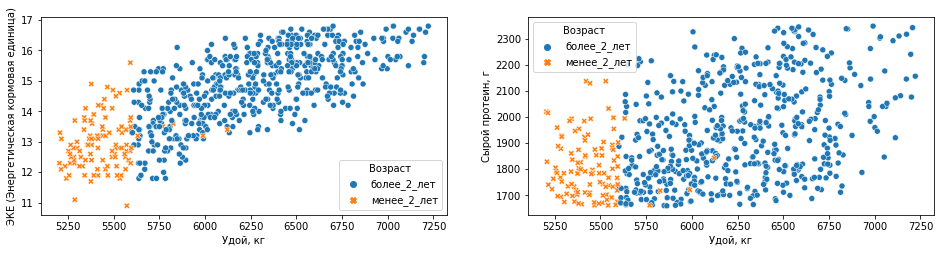

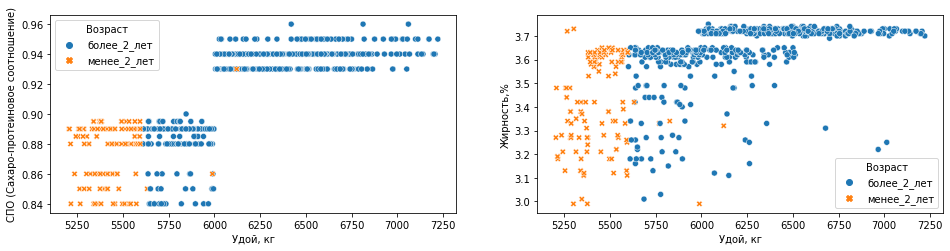

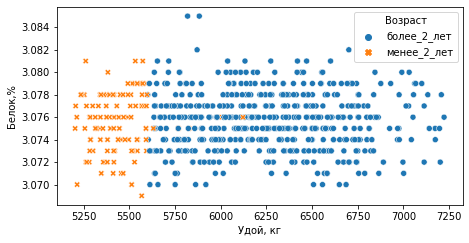

In [167]:
# Возраст
# ЭКЕ
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.scatterplot(data = df_cow, x="Удой, кг", y="ЭКЕ (Энергетическая кормовая единица)", hue = "Возраст", style="Возраст")
# Сырой протеин
plt.subplot(2,2,2)
sb.scatterplot(data = df_cow, x="Удой, кг", y="Сырой протеин, г", hue = "Возраст", style="Возраст")
# СПО
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.scatterplot(data = df_cow, x="Удой, кг", y="СПО (Сахаро-протеиновое соотношение)", hue = "Возраст", style="Возраст")
# Жирность
plt.subplot(2,2,2)
sb.scatterplot(data = df_cow, x="Удой, кг", y="Жирность,%", hue = "Возраст", style="Возраст")
# Белок
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.scatterplot(data = df_cow, x="Удой, кг", y="Белок,%", hue = "Возраст", style="Возраст")
plt.show()

А вот с **Возрастом** картина изменилась: все показатели растут с увеличением возраста коров.     
Посмотрим на зависимости по всем оставшимся категориальным признакам.

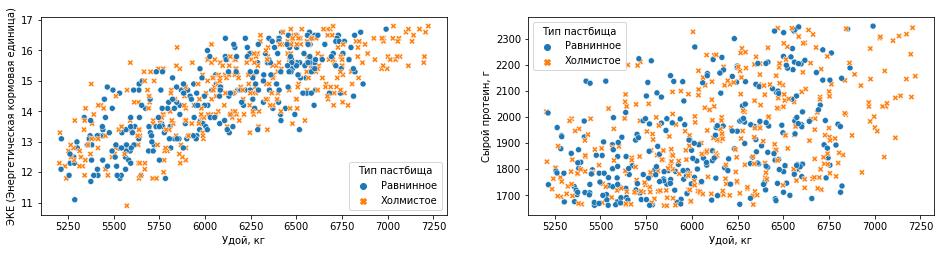

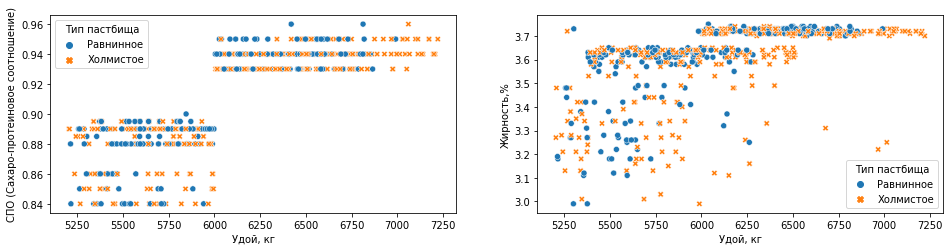

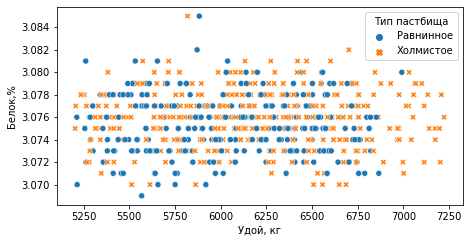

In [168]:
# Тип пастбища
# ЭКЕ
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.scatterplot(data = df_cow, x="Удой, кг",
               y="ЭКЕ (Энергетическая кормовая единица)",
               hue = "Тип пастбища", style="Тип пастбища")
# Сырой протеин
plt.subplot(2,2,2)
sb.scatterplot(data = df_cow, x="Удой, кг", y="Сырой протеин, г", hue = "Тип пастбища", style="Тип пастбища")
# СПО
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.scatterplot(data = df_cow, x="Удой, кг",
               y="СПО (Сахаро-протеиновое соотношение)",
               hue = "Тип пастбища", style="Тип пастбища")
# Жирность
plt.subplot(2,2,2)
sb.scatterplot(data = df_cow, x="Удой, кг", y="Жирность,%", hue = "Тип пастбища", style="Тип пастбища")
# Белок
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.scatterplot(data = df_cow, x="Удой, кг", y="Белок,%", hue = "Тип пастбища", style="Тип пастбища")
plt.show()

Самые большие показатели **Удоя** характерны для коров, которые паслись на холмистых пастбищах.

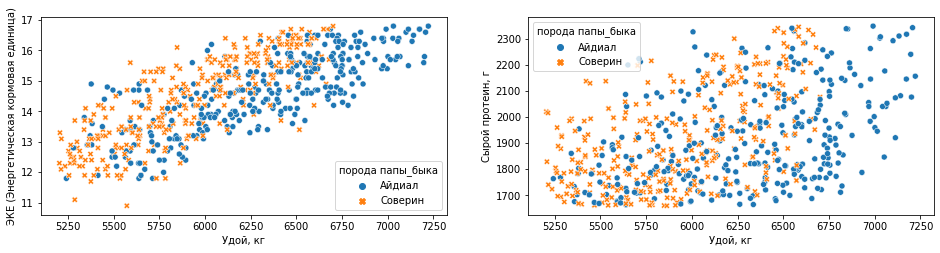

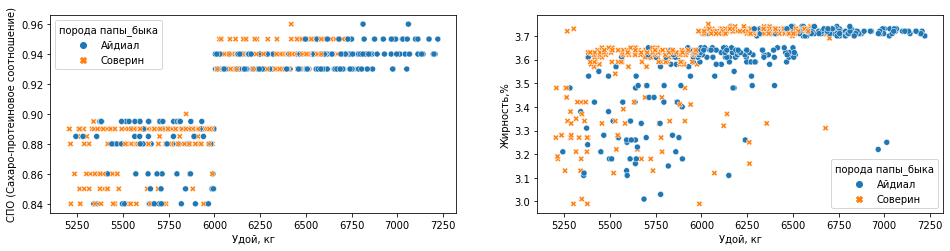

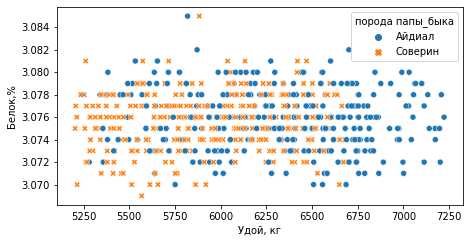

In [169]:
# Порода папы_быка
# ЭКЕ
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.scatterplot(data = df_cow, x="Удой, кг", y="ЭКЕ (Энергетическая кормовая единица)", hue = "порода папы_быка",
               style="порода папы_быка")
# Сырой протеин
plt.subplot(2,2,2)
sb.scatterplot(data = df_cow, x="Удой, кг", y="Сырой протеин, г", hue = "порода папы_быка", style="порода папы_быка")
# СПО
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.scatterplot(data = df_cow, x="Удой, кг", y="СПО (Сахаро-протеиновое соотношение)", hue = "порода папы_быка",
               style="порода папы_быка")
# Жирность
plt.subplot(2,2,2)
sb.scatterplot(data = df_cow, x="Удой, кг", y="Жирность,%", hue = "порода папы_быка", style="порода папы_быка")
# Белок
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.scatterplot(data = df_cow, x="Удой, кг", y="Белок,%", hue = "порода папы_быка", style="порода папы_быка")
plt.show()

Самые большие показатели **Удоя** характерны для коров, отцом которых являются быки породы Айдиал.

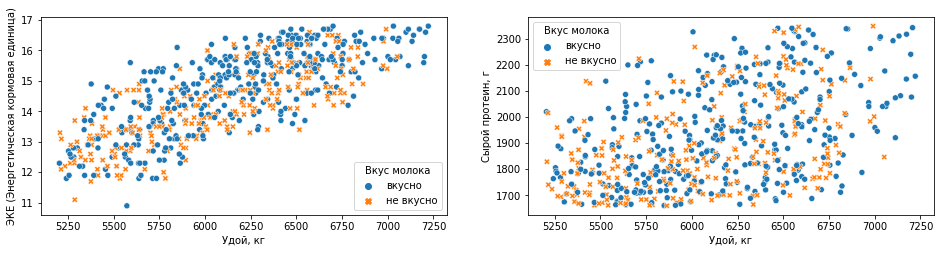

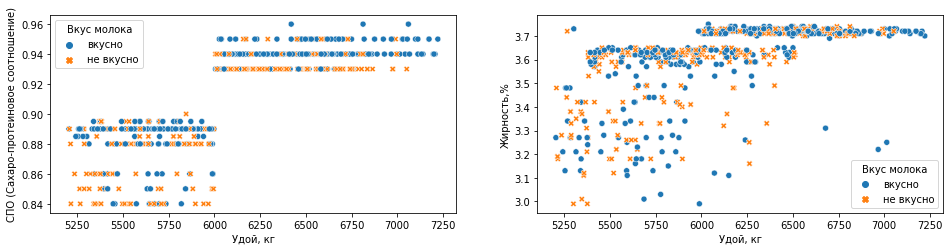

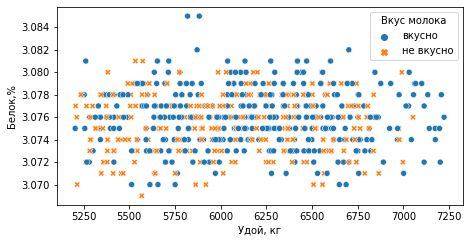

In [170]:
# Вкус молока
# ЭКЕ
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.scatterplot(data = df_cow, x="Удой, кг",
               y="ЭКЕ (Энергетическая кормовая единица)",
               hue = "Вкус молока", style="Вкус молока")
# Сырой протеин
plt.subplot(2,2,2)
sb.scatterplot(data = df_cow, x="Удой, кг", y="Сырой протеин, г", hue = "Вкус молока", style="Вкус молока")
# СПО
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.scatterplot(data = df_cow, x="Удой, кг",
               y="СПО (Сахаро-протеиновое соотношение)",
               hue = "Вкус молока", style="Вкус молока")
# Жирность
plt.subplot(2,2,2)
sb.scatterplot(data = df_cow, x="Удой, кг", y="Жирность,%", hue = "Вкус молока", style="Вкус молока")
# Белок
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.scatterplot(data = df_cow, x="Удой, кг", y="Белок,%", hue = "Вкус молока", style="Вкус молока")
plt.show()

Показатель **Вкус молока** одинаково рассеян для массы Удоя.

**Вывод:**     
Наш целевой признак **Удой** связан с 4 количественными входными признаками:
- ЭКЕ,
- СПО,
- Сырой протеин,
- Жирность.

Связь **Удоя** с показателями **ЭКЕ и Сырой протеин** *линейная*,    
а связь **Удоя** с показателями **СПО и Жирность** *нелинейная*.

Показатели **СПО и Жирность** больше похожи на категориальные признаки, для которых мы введем порог и поделим их на 2 категории относительно этого порога.

На **Удой** также влияют следующие входные категориальные признаки:
- Возраст (коровы старше 2-х лет дают больше молока);
- Порода папы_быка (самые большие показатели Удоя характерны для коров, отцом которых являются быки породы Айдиал);
- Тип пастбища (самые большие показатели Удоя характерны для коров, которые паслись на холмистых пастбищах).

Поскольку мультиколлинеарность данных определяется значением коэффициента корреляции (0.9-0.95), то приходимк выводу, что мультиколлинеарности в наших входных признаках нет. Самое большое значение коэффициента составляет **0.79**.

## Обучение модели линейной регрессии

На показатель Удоя могут повлиять показатели групп:
- Характеристики коровы (id, Порода, порода папы_быка, Возраст),
- Характеристики корма (ЭКЕ, Сырой протеин, СПО),
- Характеристики пастбищ (Тип пастбища).  

*Характеристики молока (Удой, кг, Жирность,%, Белок,%, Вкус молока) нас в данном случае не интересуют. Только Удой как целевой показатель*.  

Из выбранных групп мы обнаружили связи Удоев со следующими показателями:
- Характеристика коровы:
    - порода папы_быка,
    - Возраст,
    - Порода;
- Характеристика корма:
    - ЭКЕ,
    - СПО,
    - Сырой протеин;
- Характеристика пастбища:    
    - Тип пастбища.

In [171]:
# создадим функцию обучения модели
def LinearRegressionModel(
    df: pd.DataFrame,
    col_predict: str,
    cat_col_names: list,
    qnt_col_names: list,
    flag: str,
    df_out: pd.DataFrame
    ):
    # создаем константу RANDOM_STATE
    RANDOM_STATE = 42
    # делим данные на выборки
    X = df.drop(col_predict, axis=1)
    y = df[col_predict]
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE
    )
    
    if flag=='out':
        X_test = df_out
    # кодируем категориальные признаки с помощью OneHotEncoder
    # drop='first' удаляет первый признак из закодированных и таким образом обходим dummy-ловушку
    # задаём handle_unknown='ignore' для игнорирования признаков, которые не участвуют в обучении
    encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names]) 
    encoder_col_names = encoder.get_feature_names_out()
    df_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    df_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    # масштабируем количественные признаки с помощью StandardScaler.
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[qnt_col_names])
    X_test_scaled = scaler.transform(X_test[qnt_col_names]) 
    df_train_scaled = pd.DataFrame(X_train_scaled, columns=qnt_col_names)
    df_test_scaled = pd.DataFrame(X_test_scaled, columns=qnt_col_names)

    # объединяем преобразованные датасеты в один
    X_train_merge = pd.concat([df_train_ohe,df_train_scaled], axis=1)
    X_test_merge = pd.concat([df_test_ohe, df_test_scaled], axis=1)

    # инициализируем модель линейной регрессии
    model_lr  = LinearRegression()
    model_lr.fit(X_train_merge, y_train)
    predictions = model_lr.predict(X_test_merge)
    
    return y_test, predictions

In [172]:
# зададим параметры для первой модели МО
cat_col_names = [
    'Тип пастбища',
    'порода папы_быка',
    'Возраст',
    'Порода']
qnt_col_names = [
    'ЭКЕ (Энергетическая кормовая единица)',
    'Сырой протеин, г',
    'СПО (Сахаро-протеиновое соотношение)'
]

model_one = LinearRegressionModel(df_cow, 'Удой, кг', cat_col_names, qnt_col_names, '', None)

# оценим качество модели на тестовой выборке
r2_model_one = r2_score(model_one[0], model_one[1])

# выведем полученное значение
print(f"R2 LinearRegression первой модели = {r2_model_one:.3f}")

R2 LinearRegression первой модели = 0.784


Построенная модель может объяснить 78.4% результатов.

count    157.000000
mean     -25.373286
std      208.615463
min     -632.814111
25%     -164.145968
50%      -34.294516
75%      108.696566
max      523.551641
Name: Удой, кг, dtype: float64

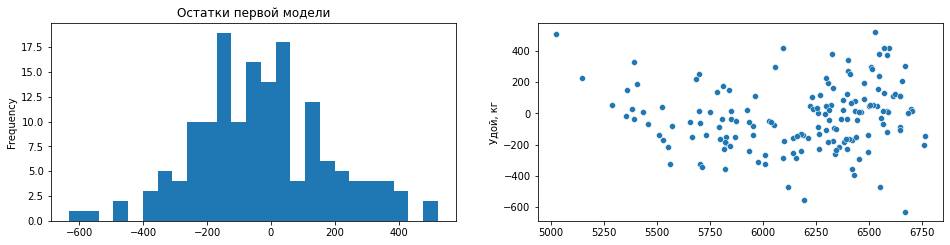

In [173]:
# строим гистограмму для анализа остатков
df_residuals=model_one[0] - model_one[1]
display(df_residuals.describe())
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
df_residuals.plot(kind='hist', bins=25, title='Остатки первой модели', xlabel='Остатки')
# строим диаграмму рассеивания для анализа разброса остатков
plt.subplot(2,2,2)
sb.scatterplot(data = df_residuals, x=model_one[1], y=df_residuals)
plt.show()

**Промежуточный вывод по модели 1:**     
Гистограмма показывает, что остатки распределены неравномерно, наблюдается смещение влево (среднее = -25), кроме того присутствуют выбросы.     
Получается, что модель часто дает завышенные оценки. Необходимо добавить в модель дополнительные признаки, нужны дополнительные исследования.     

На диаграмме рассеивания мы видим "рупор":
- разброс остатков на интервале до 6000 - (5000,6000) составляет (-400,300),
- разброс остатков на интервале после 6000 - (6000,6750) составляет (-600,500);     

То есть при предсказании Удоя модель ошибается больше для высоких показателей удоев (более 6000кг), нежели для маленьких (менее 6000кг). То есть наша первая модель завышает удои.

Ранее мы отмечали, что показатель СПО на диаграмме рассеянности больше похож на категориальный признак. Преобразуем СПО в категориальный бинарный признак.

In [174]:
df_cow['СПО_cat'] = df_cow['СПО (Сахаро-протеиновое соотношение)'].apply(lambda x: 0 if x<0.913089 else 1)

Добавим новый показатель, который равен квадрату ЭКЕ.

In [175]:
df_cow['ЭКЕ_sq'] = df_cow['ЭКЕ (Энергетическая кормовая единица)']**2

In [176]:
# зададим параметры для второй модели МО
cat_col_names = [
    'Тип пастбища',
    'порода папы_быка',
    'Возраст',
    'Порода'
]
qnt_col_names = [
    'ЭКЕ_sq',
    'Сырой протеин, г',
    'СПО_cat'
]

model_two = LinearRegressionModel(df_cow, 'Удой, кг', cat_col_names, qnt_col_names, '', None)

# оценим качество модели на тестовой выборке
r2_model_two = r2_score(model_two[0], model_two[1])

# выведем полученное значение
print(f"R2 LinearRegression второй модели = {r2_model_two:.3f}")

R2 LinearRegression второй модели = 0.818


Показатель качества модели улучшился, вторая модель может объяснить 81.8% результатов.    
Проведем анализ остатков.

count    157.000000
mean     -24.372798
std      191.495294
min     -677.411878
25%     -147.957591
50%      -27.871259
75%       60.191976
max      475.458320
Name: Удой, кг, dtype: float64

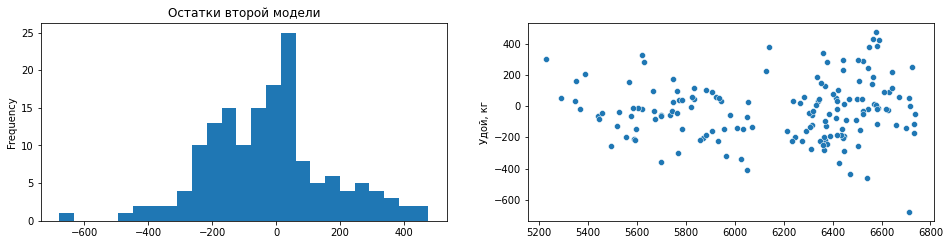

In [177]:
# строим гистограмму для анализа остатков
df_residuals = model_two[0] - model_two[1]
display(df_residuals.describe())
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
df_residuals.plot(kind='hist', bins=25, title='Остатки второй модели', xlabel='Остатки')
# строим диаграмму рассеивания для анализа разброса остатков
plt.subplot(2,2,2)
sb.scatterplot(data = df_residuals, x=model_two[1], y=df_residuals)
plt.show()

**Промежуточный вывод по модели 2:**     
Гистограмма показывает, что остатки опять распределены неравномерно, по-прежнему наблюдается смещение влево (среднее = -24), также остались выбросы.
Модель по-прежнему часто дает завышенные оценки.     
Разброс остатков изменился: стал более равномерным, картина стремится к нормальной. Наблюдается некий пояс уменьшения разброса остатков как раз по линии 6000кг.  
Необходимо добавить в модель дополнительные признаки, продолжим исследования.     
Добавим новый признак - Имя Папы.

In [178]:
df_cow_dad = df_cow.merge(df_dad, on="id", how='inner')
display(df_cow_dad)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,СПО_cat,ЭКЕ_sq,Имя Папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,1,237.16,Буйный
624,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,0,166.41,Барин
625,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,0,207.36,Барин
626,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,0,190.44,Барин


In [179]:
# зададим параметры для третьей модели МО
cat_col_names = [
    'Тип пастбища',
    'порода папы_быка',
    'Возраст',
    'Порода',
    'Имя Папы']
qnt_col_names = [
    'ЭКЕ_sq',
    'Сырой протеин, г',
    'СПО_cat'
]

model_three = LinearRegressionModel(df_cow_dad, 'Удой, кг', cat_col_names, qnt_col_names, '', None)

# оценим качество модели на тестовой выборке
r2_model_three = r2_score(model_three[0], model_three[1])

# выведем полученное значение
print(f"R2 LinearRegression третьей модели = {r2_model_three:.3f}")

R2 LinearRegression третьей модели = 0.825


Показатель качества модели улучшился в сравнении со второй моделью, третья модель объясняет 82.5% своих результатов.
Проведем анализ остатков.

count    157.000000
mean     -15.201522
std      188.865034
min     -712.793903
25%     -144.381634
50%      -15.967703
75%      112.027110
max      437.597704
Name: Удой, кг, dtype: float64

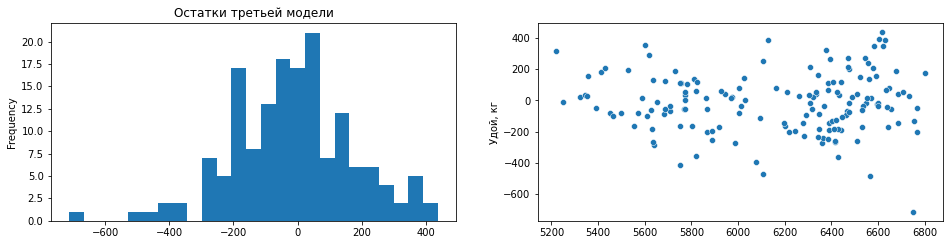

In [180]:
# строим гистограмму для анализа остатков
df_residuals = model_three[0] - model_three[1]
display(df_residuals.describe())
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
df_residuals.plot(kind='hist', bins=25, title='Остатки третьей модели', xlabel='Остатки')
# строим диаграмму рассеивания для анализа разброса остатков
plt.subplot(2,2,2)
sb.scatterplot(data = df_residuals, x=model_three[1], y=df_residuals)
plt.show()

**Промежуточный вывод по модели 3:**    

Гистограмма показывает, что остатки опять распределены неравномерно, но почти в 2 раза уменьшилось смещение влево (среднее = -15), также остались выбросы. Диаграмма рассеивания выглядит хорошо, но по-прежнему присутствует один прогноз, который сильно выбивается из массы (на -700).    
Сделаю вывод, что модель одинаково ошибается в своих прогнозах массы удоев.     

Сравним качество трех полученных моделей по метрикам:     
    1. Сопоставим R² и остатки.     
    2. Рассчитаем MSE, MAE, RMSE.

In [181]:
print(f"R2 LinearRegression первой модели = {r2_model_one:.3f} \n"
      f"R2 LinearRegression второй модели = {r2_model_two:.3f} \n"
      f"R2 LinearRegression третьей модели = {r2_model_three:.3f}")
data = {
        'y_true': model_one[0],
        'error_1': (model_one[0] - model_one[1]),    
        'error_2': (model_two[0] - model_two[1]),
        'error_3': (model_three[0] - model_three[1])
       }
df1 = pd.DataFrame(data)
display(df1.head())

# создадим функцию для расчета метрик линейной регрессии
def LinearRegressionMetrics(y_true, y_pred):
    
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    
    return mse, mae, rmse

data_metrics = {
    'metric': ['MSE', 'MAE', 'RMSE'],
    'model_1': LinearRegressionMetrics(model_one[0],model_one[1]),
    'model_2': LinearRegressionMetrics(model_two[0],model_two[1]),
    'model_3': LinearRegressionMetrics(model_three[0],model_three[1]) 
}
df2 = pd.DataFrame(data_metrics).set_index('metric')
display(df2)

R2 LinearRegression первой модели = 0.784 
R2 LinearRegression второй модели = 0.818 
R2 LinearRegression третьей модели = 0.825


,y_true,error_1,error_2,error_3
2,5810.0,-38.777255,40.424671,37.521431
6,5910.0,224.310830,283.430124,290.407029
10,5591.0,-226.485553,-84.037192,-161.179692
11,6563.0,57.103137,-19.431835,-37.335729
23,NaN,NaN,NaN,-263.243788


,model_1,model_2,model_3
metric,,,
MSE,43887.015010,37030.911311,35673.889886
MAE,164.241945,149.039652,146.163024
RMSE,209.492279,192.434174,188.875329


По всем параметрам **третья модель** представляется наиболее точной.

In [182]:
display(df_residuals.describe())
quantiles=(0.025, 0.975)

lower_quantile = np.quantile(df_residuals, quantiles[0])
upper_quantile = np.quantile(df_residuals, quantiles[1])

print(f"Доверительный интервал третьей модели составляет: [{lower_quantile}, {upper_quantile}]")

count    157.000000
mean     -15.201522
std      188.865034
min     -712.793903
25%     -144.381634
50%      -15.967703
75%      112.027110
max      437.597704
Name: Удой, кг, dtype: float64

Доверительный интервал третьей модели составляет: [-393.099637079012, 355.93715119412155]


Спрогнозируем удой коров, которых собирается купить фермер.     
Добавим средние показатели для ЭКЕ, СПО и Сырого протеина

In [183]:
df_eco[['ЭКЕ','Сырой протеин, г','СПО']] = \
    df_cow[['ЭКЕ (Энергетическая кормовая единица)',
           'Сырой протеин, г',
           'СПО (Сахаро-протеиновое соотношение)']].mean()*1.05

# предобработаем данные
df_eco['СПО_cat'] = df_eco['СПО'].apply(lambda x: 0 if x<0.913089 else 1)
df_eco['ЭКЕ_sq'] = df_eco['ЭКЕ']**2

# рассчитываем прогноз Удоев с помощью нашей 3-ей модели МО
model_four = LinearRegressionModel(df_cow_dad, 'Удой, кг', cat_col_names, qnt_col_names, 'out', df_eco)

# выведем прогнозные значение удоев
display(model_four[1])

array([6609.91929681, 6378.71102836, 6283.99977532, 6593.08937654,
       6542.14606633, 6425.38021759, 6609.91929681, 6571.25973712,
       6283.99977532, 6400.54066779, 6344.70785976, 6617.92892634,
       6609.91929681, 6127.4747423 , 6283.99977532, 6593.08937654,
       6344.70785976, 6425.38021759, 6571.25973712, 6542.14606633])

**Вывод:**

На основе исследовательского анализа данных мы отобрали показатели, которые влияют на целевой признак (Удой). На основе этих показателей мы итеративно подготовили 3 модели линейной регрессии, улучшая каждый раз предыдущую модель, и провели сравнительный анализ качества этих моделей по следующим метрикам:
- R²,
- остаткам,
- ошибкам MSE, MAE и RMSE.    

Отобрали лучшую из моделей (82.5% подтвержденных прогнозов) и определили с ее помощью прогнозные удои коров, которые собирается приобрести фермер у компании ЭкоФерма.    
Прогнозные значения удоя каждой из предлагаемых коров превышает 6000 кг, на которые расчитывает фермер.

## Обучение модели логистической регрессии

На показатель *Вкус молока* могут повлиять показатели всех групп:
- Характеристики молока (Удой, кг, Жирность,%, Белок,%, Вкус молока),
- Характеристики коровы (id, Порода, порода папы_быка, Возраст, Имя Папы),
- Характеристики корма (ЭКЕ, Сырой протеин, СПО),
- Характеристики пастбищ (Тип пастбища)  

Из выбранных групп мы обнаружили связи Удоев со следующими показателями:
- Характеристика коровы:
    - порода папы_быка,
    - Возраст,
    - Порода;
- Характеристика корма:
    - ЭКЕ (ЭКЕ_sq),
    - СПО (СПО_cat),
    - Сырой протеин;
- Характеристика пастбища:    
    - Тип пастбища;
- Характеристика молока:
    - Жирность,%,
    - Белок,%.
    
Показатель *Удой* исключим, потому что в датасете коров ЭкоФермы этого показателя нет.

In [184]:
# добавим новое поле с 0 и 1 для категорий вкуса молока: вкусно=1, не вкусно=0
df_cow_dad['MilkTaste'] = df_cow_dad['Вкус молока'].apply(lambda x: 0 if x=='не вкусно' else 1)
# создаем константу RANDOM_STATE
RANDOM_STATE = 42
# делим данные на выборки
X = df_cow_dad.drop('MilkTaste', axis=1)
y = df_cow_dad['MilkTaste']
X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE
    )
# зададим имена полей, на которых будем обучать модель
cat_col_names = [
    'Тип пастбища',
    'порода папы_быка',
    'Возраст',
    'Порода',
    'Имя Папы'
]
qnt_col_names = [
    'ЭКЕ_sq',
    'Сырой протеин, г',
    'СПО_cat',
    'Жирность,%',
    'Белок,%'
]

# кодируем категориальные признаки с помощью OneHotEncoder
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names]) 
encoder_col_names = encoder.get_feature_names_out()
df_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
df_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# масштабируем количественные признаки с помощью StandardScaler.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[qnt_col_names])
X_test_scaled = scaler.transform(X_test[qnt_col_names]) 
df_train_scaled = pd.DataFrame(X_train_scaled, columns=qnt_col_names)
df_test_scaled = pd.DataFrame(X_test_scaled, columns=qnt_col_names)

# объединяем преобразованные датасеты в один
X_train_merge = pd.concat([df_train_ohe,df_train_scaled], axis=1)
X_test_merge = pd.concat([df_test_ohe, df_test_scaled], axis=1)

# создаём объект для работы с моделью
clf = LogisticRegression()

# обучаем модель на данных
clf = clf.fit(X_train_merge, y_train)

# получаем прогнозные метки классов
y_pred = clf.predict(X_test_merge)

# выведем коэффициенты влияния каждого признака на целевой
for feature_number, feature_name in enumerate(X_train_merge.columns):
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}")
    
# проводим оценку точности
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc: .2f}")
rec = recall_score(y_test, y_pred)
print(f"Recall: {rec: .2f}")
pr = precision_score(y_test, y_pred)
print(f"Precision: {pr: .2f}")

Тип пастбища_Холмистое: +0.503757
порода папы_быка_Соверин: -0.043537
Возраст_менее_2_лет : -0.209947
Порода_РефлешнСоверинг: +0.039577
Имя Папы_Буйный     : -0.086725
Имя Папы_Геркулес   : -0.099553
Имя Папы_Соловчик   : -0.424014
ЭКЕ_sq              : +0.628363
Сырой протеин, г    : +0.174526
СПО_cat             : -0.382614
Жирность,%          : -0.014941
Белок,%             : +0.262494
Accuracy:  0.63
Recall:  0.86
Precision:  0.62


Accuracy (доля верных ответов) модели составила 63% - низкая.     
Precision (точность определения категории 1) составляет 62%.     
В 86% (Recall) случаев модель правильно определила категорию 1.     
Построим матрицу ошибок

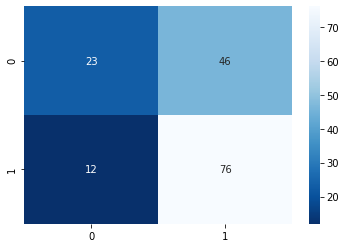

In [185]:
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

То есть модель 46 раз ошибается, что молоко вкусное и только 12 - что не вкусное. В нашем случае, критичнее всего ошибка определить не вкусное молоко как вкусное, то есть важны ошибки 1-го рода, метрика precision.     
Попробуем свести эту ошибку к 0.

In [186]:
# рассчитаем вероятности принадлежности к категории вкусное молоко
y_proba = clf.predict_proba(X_test_merge)[:,1]
dt = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)
print(dt.head())
# рассчитаем порог
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 4,endpoint=False)]
print(thresholds)

     y_valid   y_proba
85         1  0.862070
51         1  0.844292
110        1  0.843429
66         1  0.842727
8          1  0.820134
[0.1, 0.32, 0.55, 0.78]


In [187]:
# создадим переменную, которая будет хранить список новых колонок
columns = []

# добавим столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    dt['y_pred_'+str(i)] = dt['y_proba'].apply(
        lambda x: 1 if x>=i else 0)

# выведем 5 случайных строк
print(dt.sample(5))

     y_valid   y_proba  y_pred_0.1  y_pred_0.32  y_pred_0.55  y_pred_0.78
29         0  0.479018           1            1            0            0
16         0  0.682068           1            1            1            0
87         0  0.459733           1            1            0            0
123        1  0.688170           1            1            1            0
19         1  0.758923           1            1            1            0


Recall:  0.15
Precision:  0.81


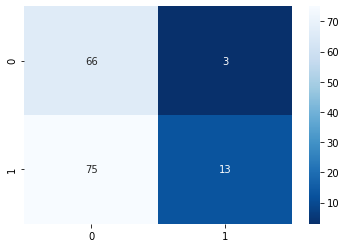

In [188]:
# минимальное значение ошибки будет близко к верхней границе порога
cm_01 = confusion_matrix(dt['y_valid'], dt['y_pred_0.78'])
sb.heatmap(cm_01, annot=True, fmt='d', cmap='Blues_r')
rec = recall_score(dt['y_valid'], dt['y_pred_0.78'])
print(f"Recall: {rec: .2f}")
pr = precision_score(dt['y_valid'], dt['y_pred_0.78'])
print(f"Precision: {pr: .2f}")

Наша ошибка (FP) снизилась до 3, поэтому изменим значение тестовых порогов и продолжим расчеты.

Таким образом, нас устроило значение порога в 0.78.     
Метрика Recall снизилась до 0.15, а precision выросла до 0.81.

In [189]:
df_eco=df_eco.rename(columns={'Текущий_уровень_белок,%':'Белок,%'})
# зададим имена полей
cat_col_names = [
    'Тип пастбища',
    'порода папы_быка',
    'Возраст',
    'Порода',
    'Имя Папы'
]
qnt_col_names = [
    'ЭКЕ_sq',
    'Сырой протеин, г',
    'СПО_cat',
    'Жирность,%',
    'Белок,%'
]
                     
# кодируем категориальные признаки в датасете ЭкоФермы с помощью OneHotEncoder
X_eco_ohe = encoder.transform(df_eco[cat_col_names]) 
encoder_col_names = encoder.get_feature_names_out()
df_eco_ohe = pd.DataFrame(X_eco_ohe, columns=encoder_col_names)

# масштабируем количественные признаки с помощью StandardScaler.
X_eco_scaled = scaler.transform(df_eco[qnt_col_names]) 
df_eco_scaled = pd.DataFrame(X_eco_scaled, columns=qnt_col_names)

# объединяем преобразованные датасеты в один
X_eco_merge = pd.concat([df_eco_ohe, df_eco_scaled], axis=1)
# получаем прогнозные метки классов по заданному порогу
y_eco_pred = np.where(clf.predict_proba(X_eco_merge)[:,1] > 0.78, 1, 0)

display(y_eco_pred)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [190]:
#код ревьюера
print(*([ '%.2f' % elem for elem in clf.predict_proba(X_eco_merge)[:,1]]), sep = ' ')

0.71   0.66   0.57   0.36   0.55   0.10   0.71   0.66   0.57   0.74   0.16   0.51   0.10   0.65   0.57   0.46   0.69   0.10   0.41   0.55


In [191]:
# код ревьюера
list_of_predictions = clf.predict_proba(X_eco_merge)[:,1]
list_of_predictions > 0.79

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [192]:
# код ревьюера
(list_of_predictions > 0.79)*1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Построенная модель определила все молоко как НЕ вкусное. Максимальная вероятность получилась равной 0.74 вместо 0.78.

## Итоговые выводы

In [199]:
# добавляем колонки с расчетными значениями в датасет ЭкоФермы
df_eco.insert(0,'MILK',y_eco_pred, allow_duplicates = False)
df_eco.insert(0,'UDOI',model_four[1], allow_duplicates = False)
display(df_eco.head())
# отберем коров, которые удовлетворяют запросу фермера: удой более 6000кг/год и вкусное молоко
df_eco.query('UDOI>=6000 and MILK==1')

,UDOI,MILK,Порода,Тип пастбища,порода папы_быка,Имя Папы,"Жирность,%","Белок,%",Возраст,ЭКЕ,"Сырой протеин, г",СПО,СПО_cat,ЭКЕ_sq
0,6609.919297,0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138
1,6378.711028,0,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138
2,6283.999775,0,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138
3,6593.089377,0,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138
4,6542.146066,0,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138


,UDOI,MILK,Порода,Тип пастбища,порода папы_быка,Имя Папы,"Жирность,%","Белок,%",Возраст,ЭКЕ,"Сырой протеин, г",СПО,СПО_cat,ЭКЕ_sq


Построенная нами модель оценила всех коров как НЕ подходящих с точки зрения вкусовых предпочтений фермера. Таким образом, фермер не должен покупать коров у ЭкоФермы.    

В итоге мы построили для фермера 3 модели линейной регрессии путем изменения набора признаков, по которым строился прогноз удоев. Наиболее удачной по метрикам mse, mae и rmse получилась 3-я модель, которой мы и предсказали удой предлагаемых коров.
Для модели логистической регрессии мы приняли, что критичнее всего ошибка определить не вкусное молоко как вкусное, и подобрали порог оценки таким образом, чтобы снизить ложноположительные ошибки до 1-2% от общего числа наблюдений. При этом метрика precision выросла до 0.81, но это низкий показатель качества моделей. По новому порогу оценки вкуса молока ни одно молоко не оказалось вкусным, но среди вероятностей попадались значения выше 0.71 (при пороге в 0.78).    

При анализе рисков или экономических расчетов важны следующие метрики:
- для линейной регрессии - MAE (определение средней ошибки и использование при работе с данными, в которых есть выбросы) и R2 (параметр качества установленных взаимосвязей показателей и точности прогнозов);
- для логистической регрессии - precision и recall, чтобы оценить точность прогнозов классификации.

Делаем общий вывод, что данных для обучения моделей было недостаточно. Поэтому в качестве *рекомендации* для фермера предлагаем запросить у ЭкоФермы дополнительные показатели для предлагаемых коров. Например, ЭКЕ, СПО, Сырой протеин, которые мы рассчитывали по средним значениям показателей наблюдений фермера. Кроме того, мы можем понизить порог классификации молока как вкусного. Например, у трех коров вероятность оценки молока как вкусного приблизился к пороговому значению (0.71 и 0.74).